In [6]:
# The Secant Optimization Algorithm: A Novel Secant Method-Based Metaheuristic for Efficient Global Optimization
# More details about the algorithm are in [please cite the original paper ]
# Mohammed Kasim, Mohammed Qaraad*, Nazar K. Hussein, M.A. Farag, and David Guinovart.
# Scentific Reports,  2025

import random
import numpy
import math
import time
import numpy as np
from numpy import abs, zeros, log10, where, arctanh, tanh
from numpy.random import uniform, standard_cauchy

def objective_Fun (x):
    return 20+x[0]**2-10.*np.cos(2*3.14159*x[0])+x[1]**2-10*np.cos(2*3.14159*x[1])

def SOA(objf, lb, ub, dim, PopSize, iters):
    
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
 
    Cost=numpy.full(PopSize,float("inf")) #record the fitness of all slime mold
    X = numpy.zeros((PopSize, dim))

    for i in range(dim):
        X[:, i] = numpy.random.uniform(0, 1, PopSize) * (ub[i] - lb[i]) + lb[i]
     
    for i in range(0,PopSize):
        X[i, :] = numpy.clip(X[i, :], lb, ub)
        Cost[i] = objf(X[i, :])

    SmellOrder = numpy.sort(Cost)  #Eq.(2.6)
    SmellIndex=numpy.argsort(Cost)
    Best_Cost = SmellOrder[0];
    sorted_population=X[SmellIndex,:]
    Best_X=sorted_population[0,:]
    Best_Cost =  SmellOrder[0]
    Best_X = sorted_population[0,:]        # Determine the vale of Best Fitness
    Delta=  1e-5;
   

    convergence_curve = numpy.zeros(iters)
   
    for l in range(0, iters):
        mean_X = numpy.mean(X, axis=0)
        distances = numpy.linalg.norm(X - mean_X, axis=1)
        closest_index = numpy.argmin(distances)
        farthest_index = numpy.argmax(distances)
        closest_X = X[closest_index]
        farthest_X = X[farthest_index]
        for i in range(0, PopSize):
            Xnew   =  numpy.zeros(dim)
            Z=Levy(dim)
            ## the Secant equation
            dfXbest=Approx_derivative(Best_X,objf,Delta,dim) # approximate derivative at Best_X
            dfX=Approx_derivative(X[i,:],objf,Delta,dim) # approximate derivative at current X
            Xnew= Best_X-(dfXbest*(X[i,:]-Best_X))/(dfX-dfXbest) #secant equation
            # proposed Local Ecape operator
            if np.random.rand() < np.random.rand():
                r=random.random()
                ids_except_current = [_ for _ in range(PopSize) if _ != i]
                id_1, id_2  = random.sample(ids_except_current,2) 
                if np.random.rand() <0.5:
                    Xnew= X[i,:]+Z*(closest_X-numpy.random.uniform(lb,ub,dim))+r*(farthest_X-X[id_1,:])
                else:
                    Xnew =Best_X+Z*(Xnew-X[i,:])+np.random.rand()*(X[i,:]-X[id_2,:])   # Eq.  
         
            Xnew = _mutation__(X[i, :], Xnew,dim,0.2,lb,ub)
            Xnew=numpy.clip(Xnew, lb, ub)           
            Xnew_Cost=objf(Xnew)
            if Cost[i] > Xnew_Cost:
                Cost[i]=Xnew_Cost 
                X[i,:]=Xnew
                if Cost[i]<Best_Cost:
                    Best_X=X[i,:]
                    Best_Cost=Cost[i]
        # if l % 1 == 0:
        #      print(["At iteration " + str(l)+ " the best fitness is "+ str(Best_Cost)])
        convergence_curve[l] = Best_Cost
    return convergence_curve

# Secant Search Rule
def Approx_derivative(X,objf,delta,dim):
    Delta = random.random();                          #  % Eq.(16.2)
    f1=objf(X+Delta)
    f2=objf(X-Delta)
    AD =(f1-f2)/(2*Delta) ;        #    % Eq.(23)    
    return AD

def Levy(dim):
    beta=1.5
    sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta) 
    u= 0.01*numpy.random.randn(dim)*sigma
    v = numpy.random.randn(dim)
    zz = numpy.power(numpy.absolute(v),(1/beta))
    step = numpy.divide(u,zz)
    return step

def _mutation__(current_pos, new_pos,dim,crossover_ratio,lb,ub):
    pos_new = numpy.where(numpy.random.uniform(0, 1, dim) < crossover_ratio, current_pos, new_pos)
    return pos_new          

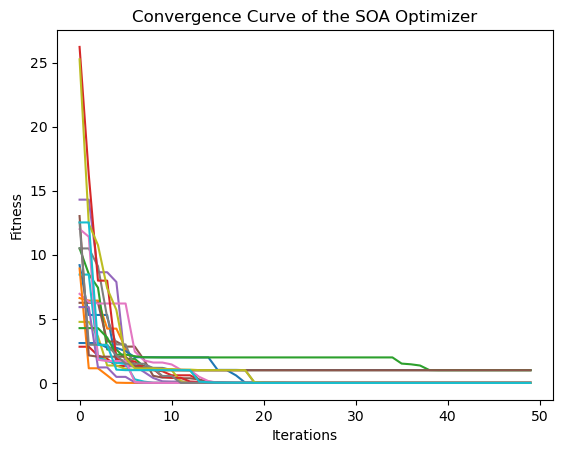

In [8]:
import matplotlib.pyplot as plt
Max_iterations=50  # Maximum Number of Iterations
swarm_size = 30 # Number of salps
LB=-10  #lower bound of solution
UB=10   #upper bound of solution
Dim=2 #problem dimensions
NoRuns=20  # Number of runs
ConvergenceCurve=np.zeros((Max_iterations,NoRuns))
for r in range(NoRuns):
    result = SOA(objective_Fun, LB, UB, Dim, swarm_size, Max_iterations)
    ConvergenceCurve[:,r]=result
# Plot the convergence curves of all runs
idx=range(Max_iterations)
fig= plt.figure()

#3-plot
ax=fig.add_subplot(111)
for i in range(NoRuns):
    ax.plot(idx,ConvergenceCurve[:,i])
plt.title('Convergence Curve of the SOA Optimizer', fontsize=12)
plt.ylabel('Fitness')
plt.xlabel('Iterations')
plt.show()